In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## Load and Prepare Data
We load the dataset and select relevant features for training.

In [16]:
# Load the dataset
df = pd.read_csv("../to_use datasets/enhanced_dataset.csv")

In [17]:
df.columns

Index(['Date', 'CPI', 'Exchange_Rate(Naira to USD)', 'Interest_Rate',
       'Money_Supply', 'Interbank_Call _rate', 'prime_Lending _rate',
       'Currency _in_Circulation', 'monetary_policy_rate',
       'treasury_Bill_rate', 'CPI_lag1', 'Exchange_Rate(Naira to USD)_lag1',
       'Interest_Rate_lag1', 'Money_Supply_lag1', 'CPI_ma3',
       'Exchange_Rate(Naira to USD)_ma3', 'Interest_Rate_ma3',
       'Money_Supply_ma3'],
      dtype='object')

In [18]:
import pandas as pd

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Select relevant features (No additions of other external features)
# trend decompostion not done yet
features = ['Exchange_Rate(Naira to USD)', 'Interest_Rate',
       'Money_Supply', 'Interbank_Call _rate', 'prime_Lending _rate',
       'Currency _in_Circulation', 'monetary_policy_rate',
       'treasury_Bill_rate', 'CPI_lag1', 'Exchange_Rate(Naira to USD)_lag1',
       'Interest_Rate_lag1', 'Money_Supply_lag1', 'CPI_ma3',
       'Exchange_Rate(Naira to USD)_ma3', 'Interest_Rate_ma3',
       'Money_Supply_ma3']
target = 'CPI'

# Drop rows with missing values
df = df[['Date'] + features + [target]].dropna()

# Define X and y
X = df[features]
y = df[target]
dates = df['Date']

In [19]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [20]:
# Time-aware split (no shuffle)
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X_scaled, y_scaled, dates, test_size=0.2, shuffle=False
)

Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [24]:
def evaluate(y_true, y_pred, dataset_name="Dataset"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Metrics:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2: {r2:.4f}")
    print("-" * 30)
    
evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")

Train Metrics:
  MSE: 0.0027
  MAE: 0.0391
  R2: 0.9902
------------------------------
Test Metrics:
  MSE: 0.0444
  MAE: 0.1485
  R2: 0.9547
------------------------------


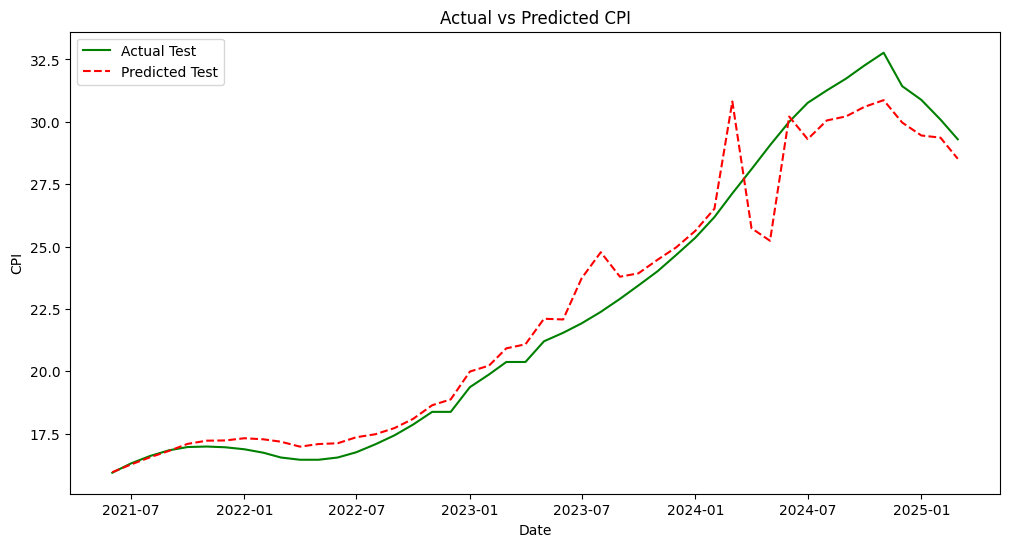

In [25]:
plt.figure(figsize=(12,6))
# plt.plot(dates_train, scaler_y.inverse_transform(y_train.reshape(-1,1)), label="Actual Train", color="blue")
# plt.plot(dates_train, scaler_y.inverse_transform(y_train_pred.reshape(-1,1)), label="Predicted Train", linestyle="--", color="cyan")
plt.plot(dates_test, scaler_y.inverse_transform(y_test.reshape(-1,1)), label="Actual Test", color="green")
plt.plot(dates_test, scaler_y.inverse_transform(y_test_pred.reshape(-1,1)), label="Predicted Test", linestyle="--", color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("CPI")
plt.title("Actual vs Predicted CPI")
plt.savefig('linear regression.png')
plt.show()

Feature Importances (Coefficients):
CPI_ma3                             1.912448
Exchange_Rate(Naira to USD)_ma3    -1.804987
Exchange_Rate(Naira to USD)_lag1    0.915473
CPI_lag1                           -0.867277
Exchange_Rate(Naira to USD)         0.626370
Money_Supply_ma3                    0.468043
Money_Supply                       -0.234633
monetary_policy_rate                0.099577
Currency _in_Circulation           -0.076451
Money_Supply_lag1                  -0.055830
treasury_Bill_rate                 -0.031623
prime_Lending _rate                -0.029019
Interest_Rate                       0.019730
Interest_Rate_ma3                  -0.013125
Interest_Rate_lag1                  0.007753
Interbank_Call _rate                0.006702
dtype: float64


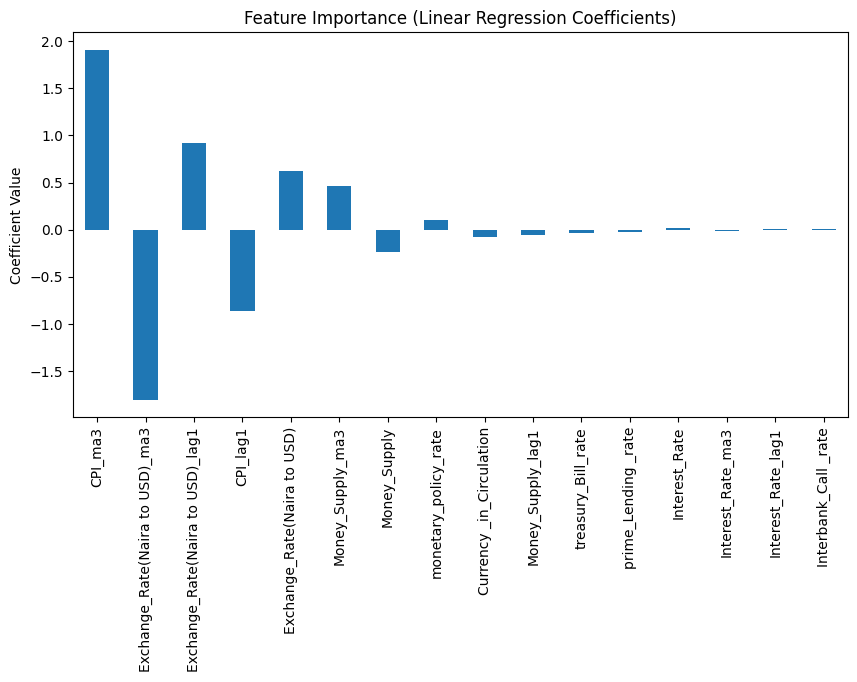

In [26]:
feature_importance = pd.Series(model.coef_, index=features)
feature_importance = feature_importance.sort_values(key=lambda x: abs(x), ascending=False)
print("Feature Importances (Coefficients):")
print(feature_importance)

# Optional: Bar plot
feature_importance.plot(kind="bar", figsize=(10,5), title="Feature Importance (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.savefig('feature importance (Linear regression).png')
plt.show()


Other models

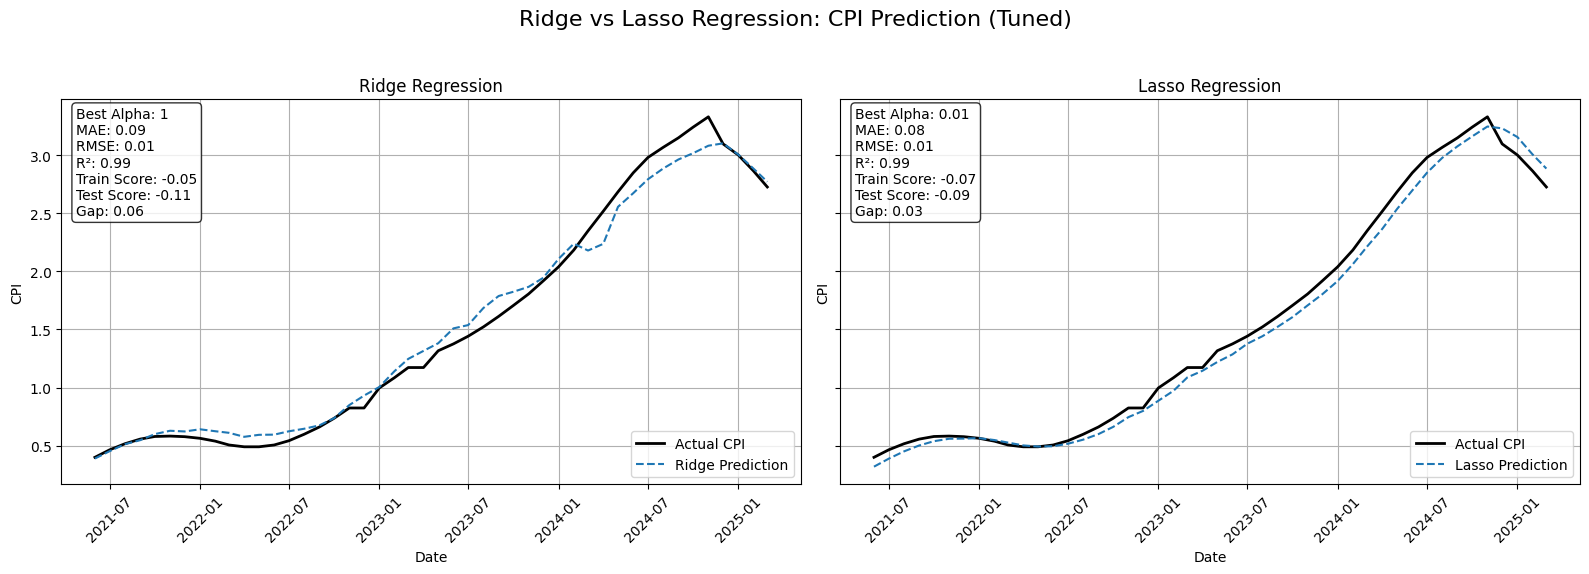

Metrics saved to 'regression_metrics_comparison.csv'
Best Model based on RMSE: Lasso


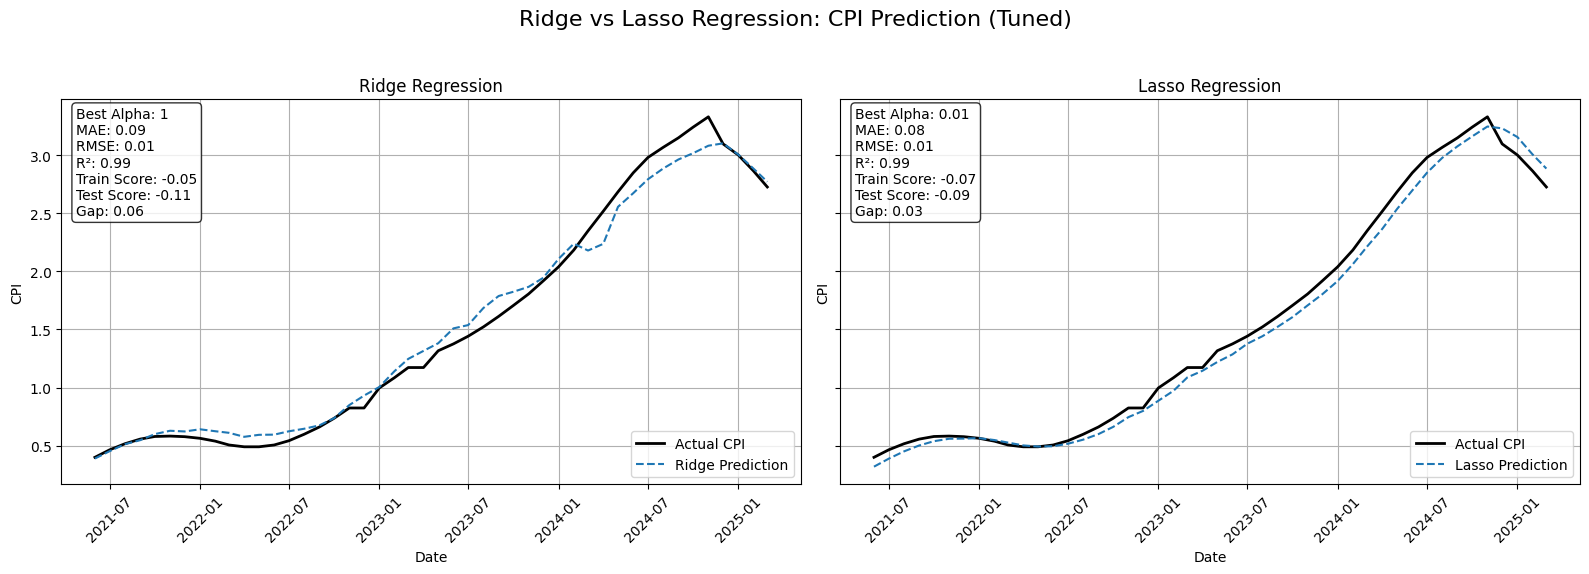

Metrics saved to 'regression_metrics_comparison.csv'
Best Model based on RMSE: Lasso


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models & parameters
models = {
    'Ridge': {
        'model': Ridge(),
        'param_grid': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'param_grid': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
    }
}

results = {}

for name, info in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name.lower(), info['model'])
    ])
    
    grid = GridSearchCV(pipeline, info['param_grid'], cv=5, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Generalization check: Train vs Test Score
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)
    generalization_gap = abs(train_score - test_score)
    
    results[name] = {
        'Best Alpha': grid.best_params_[f'{name.lower()}__alpha'],
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Train Score': train_score,
        'Test Score': test_score,
        'Gap': generalization_gap,
        'y_pred': y_pred
    }

# --- Plotting Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.plot(dates_test, y_test, label='Actual CPI', color='black', linewidth=2)
    ax.plot(dates_test, result['y_pred'], label=f'{name} Prediction', linestyle='--')
    ax.legend()
    ax.set_title(f'{name} Regression')
    ax.set_xlabel('Date')
    ax.set_ylabel('CPI')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    # Annotate metrics on the plot
    metrics_text = (
        f"Best Alpha: {result['Best Alpha']}\n"
        f"MAE: {result['MAE']:.2f}\n"
        f"RMSE: {result['RMSE']:.2f}\n"
        f"R²: {result['R²']:.2f}\n"
        f"Train Score: {result['Train Score']:.2f}\n"
        f"Test Score: {result['Test Score']:.2f}\n"
        f"Gap: {result['Gap']:.2f}"
    )
    ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Ridge vs Lasso Regression: CPI Prediction (Tuned)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Save Metrics to CSV ---
metrics_df = pd.DataFrame.from_dict(results, orient='index')
metrics_df.drop(columns=['y_pred'], inplace=True)
metrics_df.to_csv('regression_metrics_comparison.csv')
print("Metrics saved to 'regression_metrics_comparison.csv'")

# --- Selecting Best Model ---
best_model = min(results.items(), key=lambda x: x[1]['RMSE'])[0]
print(f"Best Model based on RMSE: {best_model}")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Your data here ---
# X_train, X_test, y_train, y_test, dates_test must be defined
# Example:
# X_train, X_test, y_train, y_test, dates_test = ...

# Models & parameters
models = {
    'Ridge': {
        'model': Ridge(),
        'param_grid': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'param_grid': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
    }
}

results = {}

for name, info in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name.lower(), info['model'])
    ])
    
    grid = GridSearchCV(pipeline, info['param_grid'], cv=5, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Generalization check: Train vs Test Score
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)
    generalization_gap = abs(train_score - test_score)
    
    results[name] = {
        'Best Alpha': grid.best_params_[f'{name.lower()}__alpha'],
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Train Score': train_score,
        'Test Score': test_score,
        'Gap': generalization_gap,
        'y_pred': y_pred,
        'best_model': grid.best_estimator_
    }

# --- Plotting Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.plot(dates_test, y_test, label='Actual CPI', color='black', linewidth=2)
    ax.plot(dates_test, result['y_pred'], label=f'{name} Prediction', linestyle='--')
    ax.legend()
    ax.set_title(f'{name} Regression')
    ax.set_xlabel('Date')
    ax.set_ylabel('CPI')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    # Annotate metrics on the plot
    metrics_text = (
        f"Best Alpha: {result['Best Alpha']}\n"
        f"MAE: {result['MAE']:.2f}\n"
        f"RMSE: {result['RMSE']:.2f}\n"
        f"R²: {result['R²']:.2f}\n"
        f"Train Score: {result['Train Score']:.2f}\n"
        f"Test Score: {result['Test Score']:.2f}\n"
        f"Gap: {result['Gap']:.2f}"
    )
    ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Ridge vs Lasso Regression: CPI Prediction (Tuned)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparison(ridge vs lasso).png')
plt.show()

# --- Save Metrics to CSV ---
metrics_df = pd.DataFrame.from_dict(results, orient='index')
metrics_df.drop(columns=['y_pred'], inplace=True)
metrics_df.to_csv('regression_metrics_comparison.csv')
print("Metrics saved to 'regression_metrics_comparison.csv'")

# --- Selecting Best Model ---
best_model = min(results.items(), key=lambda x: x[1]['RMSE'])[0]
print(f"Best Model based on RMSE: {best_model}")


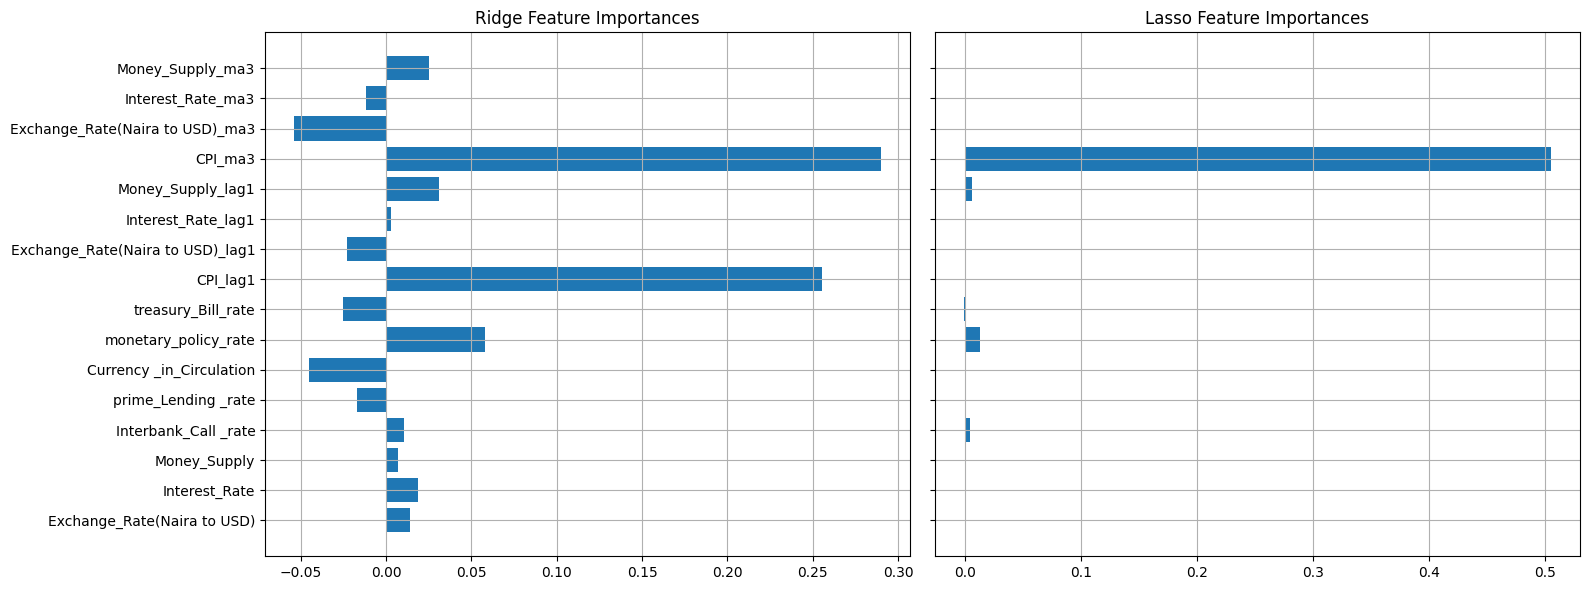

In [28]:
# --- Feature Importance Plot ---
ridge_coef = results['Ridge']['best_model'].named_steps['ridge'].coef_
lasso_coef = results['Lasso']['best_model'].named_steps['lasso'].coef_

features = features

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].barh(features, ridge_coef)
axes[0].set_title('Ridge Feature Importances')
axes[0].grid(True)

axes[1].barh(features, lasso_coef)
axes[1].set_title('Lasso Feature Importances')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('feature_importances_comparison (no additional features).png')
plt.show()

WITH ADDITIONAL FEATURES

In [51]:
# Load the dataset
df = pd.read_csv("../to_use datasets/macro_indicators + additional_features.csv")

# Convert 'Date' to datetime
df['date'] = pd.to_datetime(df['date'])


# Final selected features
final_features = [
    'exchange_rate(naira_to_usd)', 'interest_rate', 'money_supply',
    'interbank_call__rate', 'prime_lending__rate',
    'currency__in_circulation', 'monetary_policy_rate', 'treasury_bill_rate',
    'month', 'quarter', 'is_december',
    'cpi_lag1', 'cpi_lag3', 'cpi_rollmean3', 'cpi_rollstd3'
]

target = 'cpi'

# Drop rows with missing values
df = df[['date'] + final_features + [target]].dropna()

# Define X and y
X = df[final_features]
y = df[target]
dates = df['date']

In [52]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [53]:
# Time-aware split (no shuffle)
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X_scaled, y_scaled, dates, test_size=0.2, shuffle=False
)

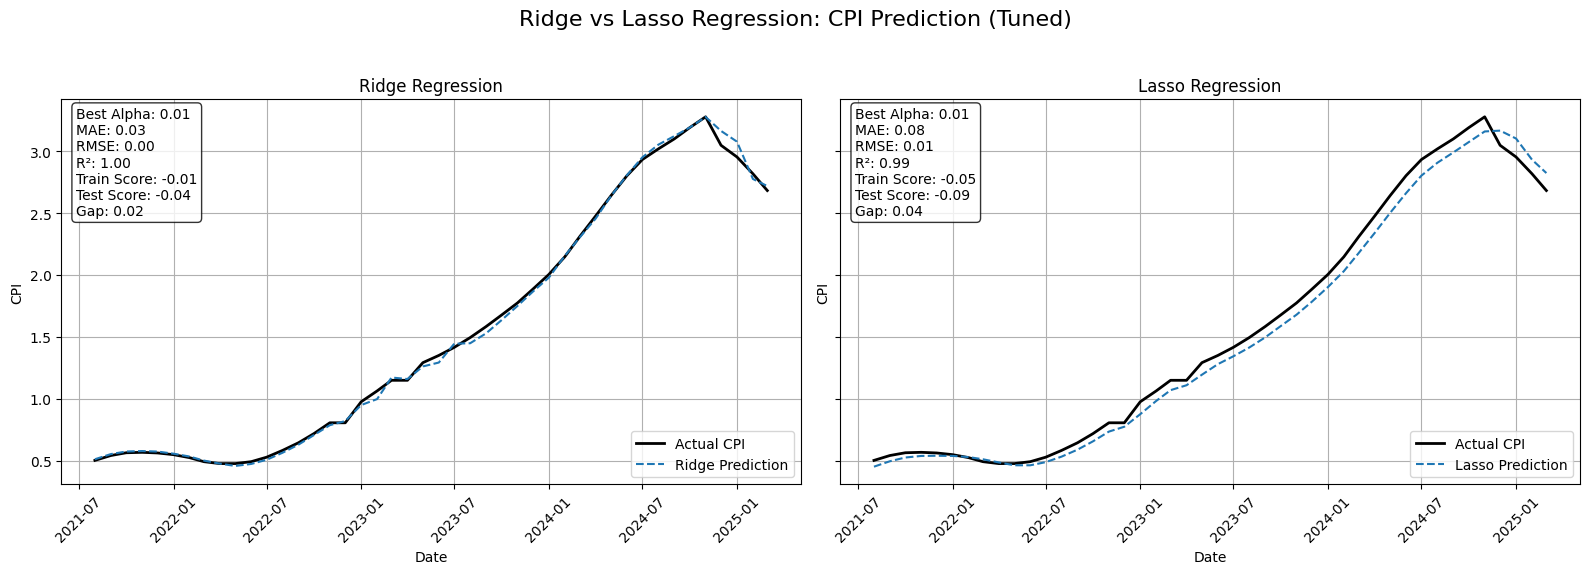

Metrics saved to 'regression_metrics_comparison.csv'
Best Model based on RMSE: Ridge


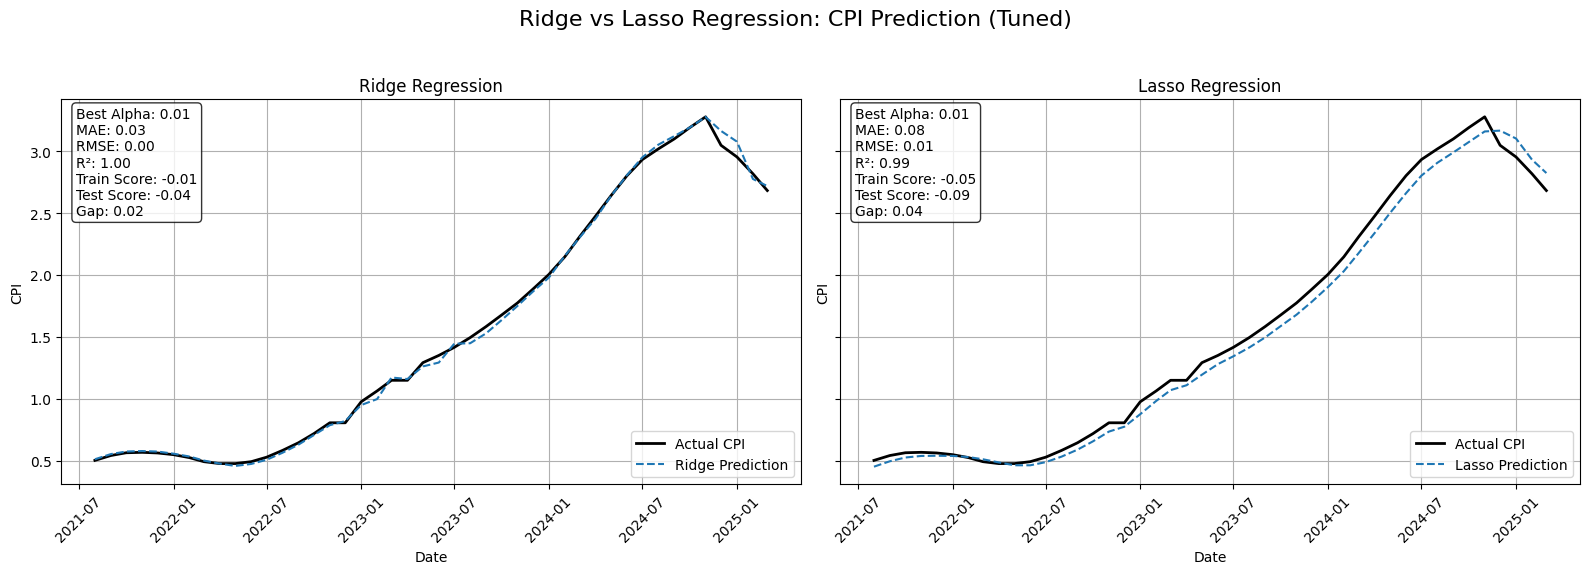

Metrics saved to 'regression_metrics_comparison.csv'
Best Model based on RMSE: Ridge


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Your data here ---
# X_train, X_test, y_train, y_test, dates_test must be defined
# Example:
# X_train, X_test, y_train, y_test, dates_test = ...

# Models & parameters
models = {
    'Ridge': {
        'model': Ridge(),
        'param_grid': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'param_grid': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
    }
}

results = {}

for name, info in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name.lower(), info['model'])
    ])
    
    grid = GridSearchCV(pipeline, info['param_grid'], cv=5, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Generalization check: Train vs Test Score
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)
    generalization_gap = abs(train_score - test_score)
    
    results[name] = {
        'Best Alpha': grid.best_params_[f'{name.lower()}__alpha'],
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Train Score': train_score,
        'Test Score': test_score,
        'Gap': generalization_gap,
        'y_pred': y_pred
    }

# --- Plotting Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.plot(dates_test, y_test, label='Actual CPI', color='black', linewidth=2)
    ax.plot(dates_test, result['y_pred'], label=f'{name} Prediction', linestyle='--')
    ax.legend()
    ax.set_title(f'{name} Regression')
    ax.set_xlabel('Date')
    ax.set_ylabel('CPI')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    # Annotate metrics on the plot
    metrics_text = (
        f"Best Alpha: {result['Best Alpha']}\n"
        f"MAE: {result['MAE']:.2f}\n"
        f"RMSE: {result['RMSE']:.2f}\n"
        f"R²: {result['R²']:.2f}\n"
        f"Train Score: {result['Train Score']:.2f}\n"
        f"Test Score: {result['Test Score']:.2f}\n"
        f"Gap: {result['Gap']:.2f}"
    )
    ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Ridge vs Lasso Regression: CPI Prediction (Tuned)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Save Metrics to CSV ---
metrics_df = pd.DataFrame.from_dict(results, orient='index')
metrics_df.drop(columns=['y_pred'], inplace=True)
metrics_df.to_csv('regression_metrics_comparison_(additional features).csv')
print("Metrics saved to 'regression_metrics_comparison.csv'")

# --- Selecting Best Model ---
best_model = min(results.items(), key=lambda x: x[1]['RMSE'])[0]
print(f"Best Model based on RMSE: {best_model}")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Your data here ---
# X_train, X_test, y_train, y_test, dates_test must be defined
# Example:
# X_train, X_test, y_train, y_test, dates_test = ...

# Models & parameters
models = {
    'Ridge': {
        'model': Ridge(),
        'param_grid': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'param_grid': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
    }
}

results = {}

for name, info in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name.lower(), info['model'])
    ])
    
    grid = GridSearchCV(pipeline, info['param_grid'], cv=5, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Generalization check: Train vs Test Score
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)
    generalization_gap = abs(train_score - test_score)
    
    results[name] = {
        'Best Alpha': grid.best_params_[f'{name.lower()}__alpha'],
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Train Score': train_score,
        'Test Score': test_score,
        'Gap': generalization_gap,
        'y_pred': y_pred,
        'best_model': grid.best_estimator_
    }

# --- Plotting Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.plot(dates_test, y_test, label='Actual CPI', color='black', linewidth=2)
    ax.plot(dates_test, result['y_pred'], label=f'{name} Prediction', linestyle='--')
    ax.legend()
    ax.set_title(f'{name} Regression')
    ax.set_xlabel('Date')
    ax.set_ylabel('CPI')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    # Annotate metrics on the plot
    metrics_text = (
        f"Best Alpha: {result['Best Alpha']}\n"
        f"MAE: {result['MAE']:.2f}\n"
        f"RMSE: {result['RMSE']:.2f}\n"
        f"R²: {result['R²']:.2f}\n"
        f"Train Score: {result['Train Score']:.2f}\n"
        f"Test Score: {result['Test Score']:.2f}\n"
        f"Gap: {result['Gap']:.2f}"
    )
    ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Ridge vs Lasso Regression: CPI Prediction (Tuned)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparison with additional Features.png')
plt.show()

# --- Save Metrics to CSV ---
metrics_df = pd.DataFrame.from_dict(results, orient='index')
metrics_df.drop(columns=['y_pred'], inplace=True)
metrics_df.to_csv('regression_metrics_comparison_(additional features).csv')
print("Metrics saved to 'regression_metrics_comparison.csv'")

# --- Selecting Best Model ---
best_model = min(results.items(), key=lambda x: x[1]['RMSE'])[0]
print(f"Best Model based on RMSE: {best_model}")


In [55]:
results[name]['best_model'] = grid.best_estimator_  # Save best model

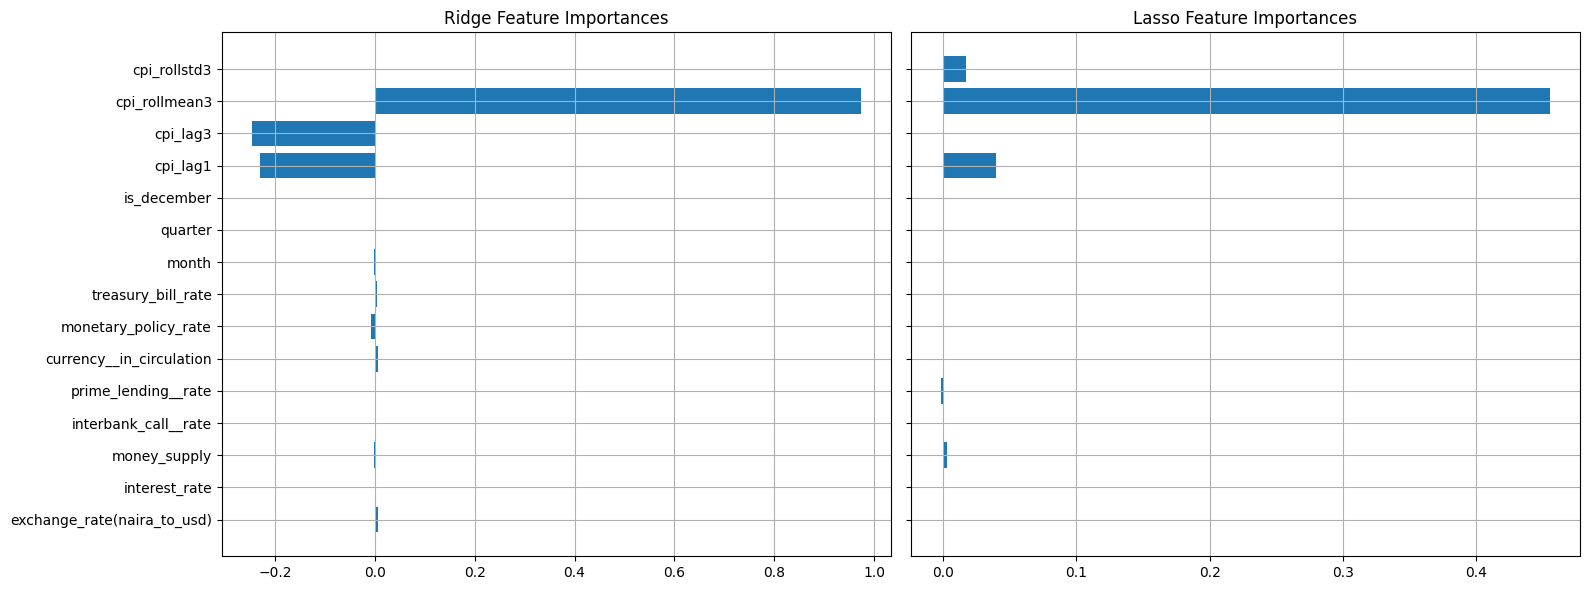

In [56]:
# --- Feature Importance Plot ---
ridge_coef = results['Ridge']['best_model'].named_steps['ridge'].coef_
lasso_coef = results['Lasso']['best_model'].named_steps['lasso'].coef_

features = final_features  # ← Replace this with your actual feature names list or df.columns

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].barh(features, ridge_coef)
axes[0].set_title('Ridge Feature Importances')
axes[0].grid(True)

axes[1].barh(features, lasso_coef)
axes[1].set_title('Lasso Feature Importances')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('feature_importances_comparison.png')
plt.show()